Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [12]:
NAME = "Rea Rustagi"
COLLABORATORS = "Sean Cohen"

---

In [13]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# HW 8:  Linear Algebra Fun with the QR and the SVD

## Question 1: Fun with the QR

**(a)** [4] - Why we use the $QR$ factorization for least-squares.

Consider the two equivalent problems to solve for the least-squares solution $\hat{\mathbf{x}}$

The Normal Equations
$$
    A^TA\hat{\mathbf{x}} = A^T\mathbf{b}
$$

and using the $QR$ factorization with $A=QR$
$$
\quad R\hat{\mathbf{x}}=Q^T\mathbf{b}
$$


* Show that the condition number of $A^TA$ is the square of that of $A$ (i.e.$\kappa_2(A^T A)$ = $\kappa_2^2(A)$).  Hint: use the SVD $A=U\Sigma V^T$
* Show that $\kappa_2(R) = \kappa_2(A)$

so that solving using the $QR$ factorization is much more stable with respect to floating point error.

We know that:
$$ \kappa_2(A) = \frac{\sigma_1}{\sigma_n} $$
and that:
$$ A=U\Sigma V^T $$
Thus, 
$$ A^TA = (U \Sigma V^T)^T U \Sigma V^T = V \Sigma^T U^T U \Sigma V^T = V \Sigma^T \Sigma V^T $$
Since $\Sigma$ is diagonal matrix:
$$ \Sigma^T \Sigma = \Sigma^2 $$
We have:
$$ \kappa_2(A^TA) = \frac{\sigma_1^2}{\sigma_n^2} $$
$$ \therefore \kappa_2(A^T A) = \kappa_2^2(A) $$

$$ \therefore \kappa_2(R) = \kappa_2 (Q^{-1} \cdot A) = ||Q^{-1} \cdot  A||\cdot||A^{-1} \cdot Q|| = \newline ||Q^{-1}||\cdot||A||\cdot||A^{-1}||\cdot||Q|| = ||Q^T||\cdot||Q||\cdot||A||\cdot||A^{-1}|| = I\cdot||A||\cdot||A^{-1}|| = \kappa_2(A) $$

**(b)** [8] - The Householder reflection matrix, 

$$
    H = I - 2\mathbf{q}\mathbf{q}^T
$$

reflects a vector $x$ across a mirror plane normal to a unit vector $\mathbf{q}$ and is an essential ingredient in many numerical methods.

Demonstrate the following properties of $H$

* $H$ is symmetric
* $H$ is Unitary
* $H$ is not a projection matrix
* if $\mathbf{x}$ is in $\mathbb{R}^n$,  the Matrix-vector product $H\mathbf{x}$ can be computed in $O(n)$ operations
* Repeated application of householder matrices to transform $A\rightarrow R$ do not change the condition number (i.e. $\kappa_2(HA) = \kappa_2(A) = \kappa_2(R)$

$H$ is symmetric:
$$ (I - 2\mathbf{q}\mathbf{q}^T)^T = I^T - (2\mathbf{q}\mathbf{q}^T)^T 
 = I - 2\mathbf{q}\mathbf{q}^T = H \rightarrow H^T = H 
$$
$H$ is unitary: since we know $H = H^T$ and that $H$ is a reflection matrix:
$$ HH^T = H^2 = I$$
$H$ is not a projection matrix: we already established that $H^2 = I$. So, $H$ cannot be a projection matrix because $H^2 \neq H$.
$\newline$
The matrix-vector multiplication is completed in $O(n^2)$ operations for $\mathbb{R}^n$. However, since $H$ is the identity matrix plus a rank one matrix:
$$Hx = x - 2q(q^Tx)$$ 
which is a product of $O(n)$ operations so  $O(n)$ overall.
$\newline$
We showed above that $\kappa_2(A)=\kappa_2(R)$.
$\newline$ For the first part: $\kappa_2(HA)$ is based on the spectrum of $(HA)^THA = A^TH^THA = A^TA$ because $H^TH = I$. 
$\newline$ Thus: $$\kappa_2 (HA) = \kappa_2(A)=\kappa_2(R)$$

**(c)** [6] - To understand the basic algorithms better,  use the modified Gram-Schmidt algorithm 

$$A\rightarrow Q,\quad   R = Q^T A$$

to construct, by hand, matrices $Q$ and $R$ such that $A=QR$ for 

$$
    A = \begin{bmatrix} 1 & 1 & 1\\ 1 & 0 & 0 \\ 1 & 1 & 0  \\ 1 & 0 & 0 \\ \end{bmatrix} 
$$

You can use any python/numpy routines to check your answers

j = 1:

$$\begin{align*}
r_{11} = ||a_1|| = 2 \\
q_1 = \frac{a_1}{r_{11}} = \frac{1}{2} \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1\end{bmatrix}
\end{align*}$$
j=2, 3:
$$\begin{align*}
r_{1j} = q_1^T a_j , r_{12} = 1, r_{13} =\frac{1}{2} \\
a_j \rightarrow a_j - r_{1,j} q_1 \\ 
a_2 = \begin{bmatrix}  1 \\  0 \\  1 \\  0 \end{bmatrix} - \frac{1}{2} \begin{bmatrix}  1 \\  1 \\  1 \\  1 \end{bmatrix} = \frac{1}{2} \begin{bmatrix}  1 \\  -1 \\  1 \\  -1 \end{bmatrix} \\
a_3 = \begin{bmatrix}  1 \\  0 \\  0 \\  0 \end{bmatrix} - \frac{1}{4} \begin{bmatrix}  1 \\  1 \\  1 \\  1 \end{bmatrix} = \frac{1}{4} \begin{bmatrix}  3 \\  -1 \\  -1 \\  -1 \end{bmatrix} \\
\end{align*}$$$$\begin{align*}
r_{22} = ||a_2|| = 1, q_2 = \frac{a_2}{r_{22}} = \frac{1}{2} \begin{bmatrix}  1 \\  -1 \\  1 \\  -1 \end{bmatrix}
\end{align*}$$
j=3:
$$\begin{align*}
r_{2j}=q_2^T a_j , r_{23} = \frac{1}{2}\\
a_j \rightarrow a_j - r_{2,j}q_2 \\
a_3 = \frac{1}{4} \begin{bmatrix}  3 \\  -1 \\  -1 \\  -1 \end{bmatrix} - \frac{1}{4} \begin{bmatrix}  1 \\  -1 \\  1 \\  -1 \end{bmatrix} = \frac{1}{2} \begin{bmatrix}  1 \\  0 \\  -1 \\ 0 \end{bmatrix} \\ 
r_{33} = ||a_3|| = \frac{1}{\sqrt{2}} , q_3 = \frac{a_3}{r_{33}} = \frac{1}{\sqrt{2}} \begin{bmatrix}  1 \\  0 \\  -1 \\0 \end{bmatrix} = \frac{\sqrt{2}}{2} \begin{bmatrix}  1 \\  0 \\  -1 \\0 \end{bmatrix}
\end{align*}$$
Finally, we get:
$$\begin{align*}
Q=\frac{1}{2} \begin{bmatrix} 1 & 1 & \sqrt{2} \\ 1 & -1 & 0 \\1 & 1 & -\sqrt{2} \\ 1 & -1 & 0 \end{bmatrix} ,
R =\begin{bmatrix} 2 & 1 & \frac{1}{2} \\ 0 & 1 & \frac{1}{2} \\ 0 & 0 & \frac{1}{\sqrt{2}}\end{bmatrix}
\end{align*}$$

In [14]:
A = numpy.array([[1, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 0]])
Q, R = numpy.linalg.qr(A)

print(A)
              
print(Q)

print(R)

[[1 1 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]]
[[-5.000000000000000e-01  4.999999999999999e-01  7.071067811865475e-01]
 [-5.000000000000000e-01 -4.999999999999999e-01 -5.551115123125783e-17]
 [-5.000000000000000e-01  5.000000000000000e-01 -7.071067811865476e-01]
 [-5.000000000000000e-01 -5.000000000000000e-01 -8.326672684688674e-17]]
[[-2.                 -1.                 -0.5               ]
 [ 0.                  1.                  0.4999999999999999]
 [ 0.                  0.                  0.7071067811865476]]


**(c)** [4]  Householder Triangulation is a sequence of Unitary transformations $Q_1$, $Q_2$, $Q_3$, that transform $A$ to logically upper triangular form (i.e. is zero for all elements below the diagonal) using Householder reflection matrices.  Construct by hand

* the first Unitary matrix  $Q_1$ that zeros out the first column of A below the diagonal and calculate $A_1 = Q_1A$. (you can use numpy to check your solution).   **Hint**: there are two ways to calculate the normal to the reflection plane 
$\mathbf{v}$.  Your life will be 
much easier if you use the simpler version 

$$
    \mathbf{v} = ||\mathbf{x}||\mathbf{e}_1 - \mathbf{x}
$$

* the second unitary matrix $Q_2$ that preserves your first column but puts zeros below the diagonal in the second column.  You can use numpy to calculate $Q_2Q_1A$ to check your answer.

* **Extra Credit** (2 pts) Work out $Q3$  and $R=Q_3Q_2Q_1A$ and compare to the solution by Modified Gram-schmidt

Left blank intentionally. Finals season :(

In [15]:
# you can add code to check your answer here if you want

**(d)** [10] - Modify the $QR$ factorization by Householder reflection given in class `householder_QR` to write a function to solve linear least-squares problems, i.e. use repeated Householder reflections to transform

$$
    A\mathbf{x} = \mathbf{b}
$$

to

$$ R\mathbf{x} = \mathbf{c} $$

where $\mathbf{c} = Q^T\mathbf{b}$.  Then solve the last equation for $\mathbf{x}$ using `numpy.linalg.solve` (which implements a $LU$ decomposition for Gaussian elimination).


In [16]:
# Implementation of Householder QR, for least-squares
def mylstq(A, b):
    """
    Solves the leastsquares problem Ax = b, by Householder reduction to Rx = c,
    then solve Rx = c, using numpy.linalg.solve()
    
    parameters:
    -----------
    
    A: array 
        input matrix
    b: vector
        input vector
    returns:
    --------
    x: vector
        solution to Ax = b
    
    usage:  x = mylstq(A, b)
    """
    R = A.copy() # we want to use a local copy of A
    v = numpy.empty(A.shape)
    m, n = A.shape
    
    for i in range(n):
        x = R[i:, i]
        e_1 = numpy.zeros(x.shape)
        e_1[0] = 1.0
        v[i:, i] = numpy.sign(x[0]) * numpy.linalg.norm(x, ord = 2) * e_1 + x
        v[i:, i] = v[i:, i] / numpy.linalg.norm(v[i:, i], ord = 2)
        R[i:, i:] -= 2.0 * numpy.dot(numpy.outer(v[i:, i], v[i:, i]), R[i:, i:])

    Q = numpy.zeros(A.shape)
    for j in range(n):
        e_n = numpy.zeros(m)
        e_n[j] = 1.0
        for k in range(n - 1, -1, -1):
            e_n[k:m] -= 2.0 * numpy.dot(numpy.outer(v[k:, k], v[k:, k]), e_n[k:m])
        Q[:, j] = e_n
        
    x = numpy.linalg.solve(R[:n, :n],numpy.dot(Q.T,b))
    
    return x

In [17]:
# Test this on the previous problem
A = numpy.array([ [ 1., 1., 1.],
                  [1., 0., 0.],
                  [1., 1., 0.],
                  [1., 0., 0.]])
b = numpy.array([ 3., -2., 1., 0.])

x = mylstq(A,b)
x_np = numpy.linalg.lstsq(A,b,rcond = None)[0]
print('my solution = {}'.format(x))
print('numpy.lstq  = {}'.format(x_np))
numpy.testing.assert_allclose(x, x_np)
print('Success!')

my solution = [-0.9999999999999997  1.9999999999999993  1.9999999999999998]
numpy.lstq  = [-0.9999999999999989  1.9999999999999982  1.9999999999999996]
Success!


**(e)** [4] - **Extra Credit** Use your routine to find the best fit of the function 

$$
    y = c_1 x + c_2e^{x}
$$ 
through the $(x, y)$ data points $(1,2)$, $(2,3)$, $(3,5)$, $(4,10)$, $(5,15)$ and make a plot comparing the best fit function to the data over the interval $x \in [0, 6]$.

In [18]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

## Question 2 - Hidden Figures

A little fun with the SVD.  Here we are going to use it extract low-dimensional information embedded in high dimensions.

The following cells will read in a matrix of 46765 samples of 5-dimensional data and make a series of scatter plots comparing the data along each dimension pairwise.

In [19]:
data = pd.read_csv('data.csv.gz').values
print('shape = {}'.format(data.shape))

shape = (46765, 5)


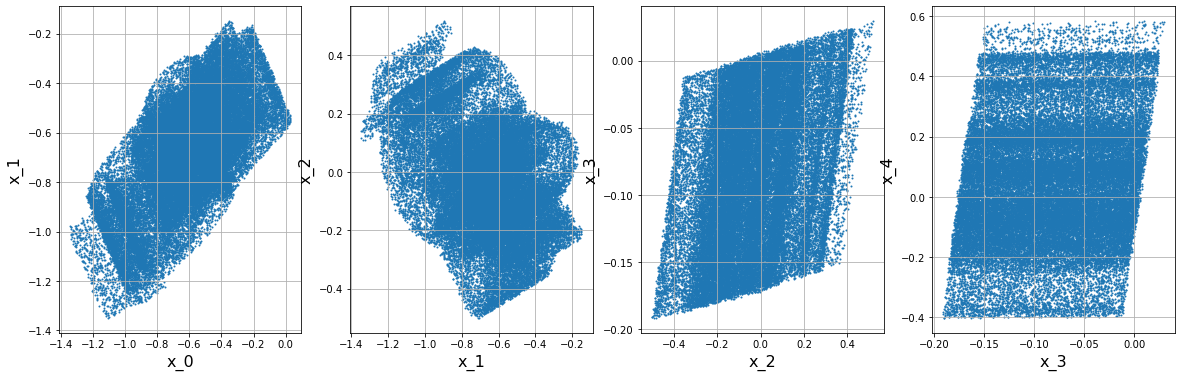

In [20]:
# plot scatter diagrams

fig = plt.figure(figsize=(20,6))
for i in range(4):
    axes = fig.add_subplot(1,4,i+1)
    axes.scatter(data[:,i],data[:,i+1],s=1)
    axes.set_xlabel('x_{}'.format(i), fontsize=16)
    axes.set_ylabel('x_{}'.format(i+1),fontsize=16)
    axes.grid()
plt.show()

**(a)** [6] Now demean the data and use the SVD to determine the dimension of the subspace of $\mathbb{R}^5$ that contains the data. Making a plot of the singular values will help. (hint: you will also want to use the `full_matrices=False` argument to the SVD to get the skinny SVD and save a lot of computation and memory)

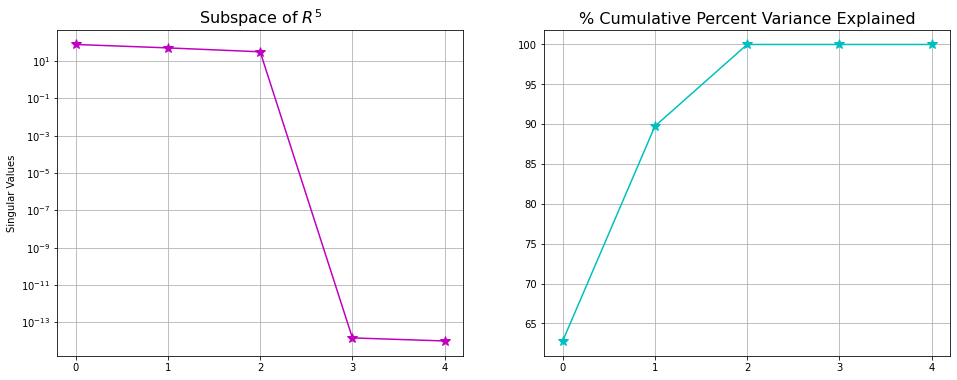

In [21]:
mean = data.mean(axis = 0)
demean_data = data - mean
u, s, v_t = numpy.linalg.svd(demean_data,full_matrices = False)


fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 2, 1)
axes.semilogy(s, "m*-", markersize=10)
axes.set_ylabel('Singular Values')
axes.grid()
axes.set_title('Subspace of $R^5$', fontsize = 16)
plt.xticks([0, 1, 2, 3, 4])

# and cumulative percent of variance
axes = fig.add_subplot(1, 2, 2)
g = numpy.cumsum(s*s)/numpy.sum(s*s)*100
axes.plot(g,'c*-', markersize=10)
axes.set_title('% Cumulative Percent Variance Explained', fontsize = 16)
plt.xticks([0, 1, 2, 3, 4])
axes.grid()

plt.show()

The first three singular values are non-zero, and the total variance can be explained by these 3 elements. Thus, we can conclude that the dimension of the subspace of $\mathbb{R}^5$ is 3. 

**(b)** [4]  Principal Components. Make a 2-D scatter plot that projects the data onto the plane spanned by the first two principal components (singular vectors of $V$).  and comment.  (**Extra Credit** do this in 3-D)

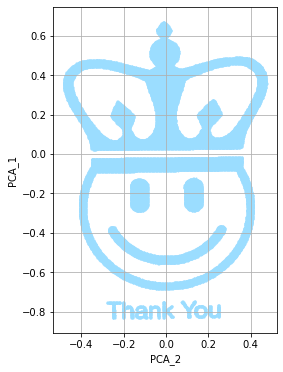

In [23]:
xsvd = numpy.dot(u[:,:2], numpy.diag(s[:2]))

fig, axes = plt.subplots(1,1,figsize=(4,6))

axes.scatter(-xsvd[:,1], -xsvd[:,0], s = 1, c = '#9bddff')
axes.set_xlabel('PCA_2')
axes.set_ylabel('PCA_1')
axes.grid()

plt.show()